##*************** Predict Restaurant Ratings ***************

---

### * Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

### * Steps:
####1. Preprocess the dataset by handling missing values,encoding categorical variables, and splitting the data into training and testing sets.
####2. Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.
####3. Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared)on the testing data.
####4. Interpret the model's results and analyze the most influential features affecting restaurant ratings.

#####* Dataset.csv should be uploaded in the collaboratory in order to execute the code.

###Machine Learning Model used here:
 #### Linear Regression.

#####Importing Required Libraries

In [298]:
!git clone https://github.com/komal020304/ML_Restaurant_Rating_Prediction_Model.git

fatal: destination path 'ML_Restaurant_Rating_Prediction_Model' already exists and is not an empty directory.


In [299]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#Model Specific Libraries
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

##### Understanding and Handling Data.

In [301]:
# Load the dataset
dataset = pd.read_csv("Dataset.csv")

# Check the number rows and columns
dataset.shape

(9551, 21)

In [302]:
dataset.head()

,Restaurant ID,Restaurant_Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [303]:
# Handle missing values
dataset = dataset.fillna(np.NAN)
dataset.head()

,Restaurant ID,Restaurant_Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [304]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant_Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

####Describing Votes of Restaurant

In [305]:
dataset['Votes'].describe()

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

####Observation:

1.   Min Votes: 0
1.   Max Votes: 10934
2.   Avg Votes: 156


####Data Preprocessing

##### Removing Irrevelant Columns from the dataset

In [306]:
dataset.loc[:,['Address','Locality','Locality Verbose']].sample(8,random_state=1)


,Address,Locality,Locality Verbose
8288,"Shop 6, N Block, Sector 12, Noida",Sector 12,"Sector 12, Noida"
3601,"The Manor, 77, Friends Colony, New Delhi",Friends Colony,"Friends Colony, New Delhi"
5887,"Shop 72, Aggarwal Heights, Netaji Subhash Plac...",Netaji Subhash Place,"Netaji Subhash Place, New Delhi"
3305,"2512, Hudson Lane, Near GTB Nagar Metro Statio...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi"
218,"316 N Hamilton St, Dalton, GA 30720",Dalton,"Dalton, Dalton"
3506,"Near Iskcon Temple, East of Kailash, New Delhi",East of Kailash,"East of Kailash, New Delhi"
2285,"4th Floor, Dona Planet Multiplex Mall, D. Neog...",Christian Basti,"Christian Basti, Guwahati"
6197,"1/2, Opposite White House, Sunder Vihar, Pasch...",Paschim Vihar,"Paschim Vihar, New Delhi"


In [307]:
# Dropping unnecessary columns
column_to_drop = ['Address','Locality','Locality Verbose']
dataset.drop(columns=column_to_drop,axis=1,inplace=True)

In [308]:
dataset.columns

Index(['Restaurant ID', 'Restaurant_Name', 'Country Code', 'City', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Rating', 'Rating color',
       'Rating text', 'Votes'],
      dtype='object')

In [309]:
# Removing Duplicates from a dataset
dataset.drop_duplicates(inplace=True)

In [310]:
# Check for NaN or Null values
((dataset.isna().sum()/dataset.shape[0])*100).round(2)

Restaurant ID           0.00
Restaurant_Name         0.00
Country Code            0.00
City                    0.00
Longitude               0.00
Latitude                0.00
Cuisines                0.09
Average Cost for two    0.00
Currency                0.00
Has Table booking       0.00
Has Online delivery     0.00
Is delivering now       0.00
Switch to order menu    0.00
Price range             0.00
Rating                  0.00
Rating color            0.00
Rating text             0.00
Votes                   0.00
dtype: float64

####Observation:
#####It means no data will be lost in NaN values and the model will give the accurate results

In [311]:
# Checking the unique ratings
dataset.Rating.unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

#### Data Visualisation

Mean: 2.66637001361114


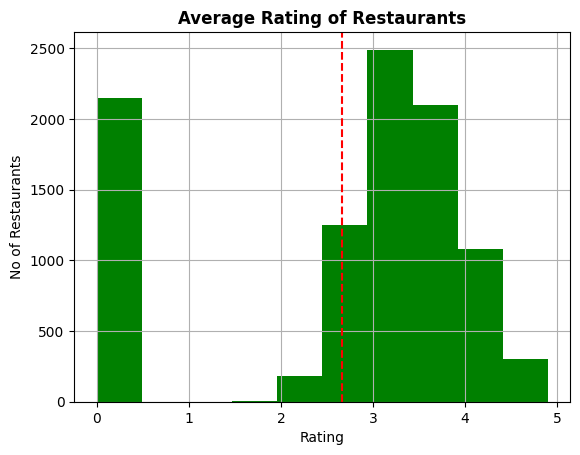

In [312]:
dataset.Rating.hist(color='green')
plt.axvline(x= dataset.Rating.mean(),ls='--',color='red')
plt.title('Average Rating of Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean:",dataset.Rating.mean())

In [313]:
# Top Restaurants on the basis of Ratings
dataset.Restaurant_Name.value_counts().head(20)

Cafe Coffee Day        83
Domino's Pizza         79
Subway                 63
Green Chick Chop       51
McDonald's             48
Keventers              34
Pizza Hut              30
Giani                  29
Baskin Robbins         28
Barbeque Nation        26
Giani's                22
Barista                22
Dunkin' Donuts         22
Costa Coffee           20
Pind Balluchi          20
Wah Ji Wah             19
Twenty Four Seven      19
Pizza Hut Delivery     19
Sagar Ratna            19
Republic of Chicken    18
Name: Restaurant_Name, dtype: int64

####Data Modeling

In [314]:
dataset.head(10)

,Restaurant ID,Restaurant_Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [315]:
# Removing ',' between two words and then converting it to categorical features
dataset['Cuisines']=dataset['Cuisines'].str.replace(',','')
dataset['Cuisines']=dataset['Cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
dataset['Cuisines'].value_counts().head(20)

Indian North                         936
Chinese Indian North                 616
Indian Mughlai North                 394
Chinese                              354
Fast Food                            354
Chinese Indian Mughlai North         306
Cafe                                 299
Bakery                               218
Bakery Desserts                      181
Chinese Fast Food                    159
Food Street                          149
Fast Food Pizza                      142
Chinese Indian Indian North South    135
Food Mithai Street                   134
Fast Food Indian North               120
Bakery Fast Food                     117
Indian South                         112
Cream Desserts Ice                   109
Chinese Continental Indian North     107
Mughlai                              103
Name: Cuisines, dtype: int64

In [316]:
dataset.head(10)

,Restaurant ID,Restaurant_Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,Desserts French Japanese,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,Asian Filipino Indian Seafood,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,Japanese Sushi,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,Japanese Korean,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,120.979667,14.531333,Asian European,2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,120.979333,14.540000,Asian European Filipino Seafood,2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,120.980090,14.552990,Asian European Indian,6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


#### Splitting The Data for Building Model

In [317]:
# Avoid Data Leakage
label_encoder = LabelEncoder()
for column in dataset.select_dtypes(include=["object"]):
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['Rating'], test_size=0.33)

In [319]:
X_train.head(5)

,Restaurant ID,Restaurant_Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating,Rating color,Rating text,Votes
4453,3635,4541,1,88,77.257084,28.540697,1228,600,4,0,0,0,0,2,3.6,5,2,91
9452,6403452,4409,189,22,18.382759,-33.921692,375,125,9,0,0,0,0,2,4.4,1,5,157
2912,311022,460,1,88,77.226874,28.649391,1151,100,4,0,0,0,0,1,4.1,1,5,118
7320,3686,188,1,88,77.220136,28.563712,1219,400,4,0,0,0,0,1,2.9,2,0,18
9293,18408381,2336,94,59,106.856413,-6.232816,1330,100000,5,0,0,0,0,3,4.0,1,5,331


In [320]:
# Checking training dataset
X_train.shape, y_train.shape

((6399, 18), (6399,))

In [321]:
# Checking Testing Dataset
X_test.shape, y_test.shape

((3152, 18), (3152,))

#### Building a model for Mean Squared Error (MSE) :

##### Linear Regression Model

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:",mse)

MSE: 6.729601444450815e-28


In [323]:
# Interpret the model's results
Most_influential_features = np.argsort(model.coef_)[::-1][:5]
print("Most Influential features:", Most_influential_features)


Most Influential features: [14  9 11 12  4]


In [324]:
# Restaurant_Name=dataset.column(Restaurant_Name)
Randpred=pd.DataFrame({"actual":y_test,"predicted":y_pred})
Randpred

,actual,predicted
6999,3.9,3.900000e+00
4221,3.7,3.700000e+00
1172,0.0,3.032666e-15
3601,4.9,4.900000e+00
1402,4.3,4.300000e+00
...,...,...
7118,3.0,3.000000e+00
4732,2.4,2.400000e+00
6640,3.2,3.200000e+00
6336,3.4,3.400000e+00


In [325]:
import pickle

In [326]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [327]:
 # Loading the saved Model
 loaded_model=pickle.load(open('trained_model.sav','rb'))

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = loaded_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:",mse)

# Interpret the model's results
Most_influential_features = np.argsort(model.coef_)[::-1][:5]
print("Most Influential features:", Most_influential_features)

Randpred=pd.DataFrame({"actual":y_test,"predicted":y_pred})
Randpred

MSE: 6.729601444450815e-28
Most Influential features: [14  9 11 12  4]


,actual,predicted
6999,3.9,3.900000e+00
4221,3.7,3.700000e+00
1172,0.0,3.032666e-15
3601,4.9,4.900000e+00
1402,4.3,4.300000e+00
...,...,...
7118,3.0,3.000000e+00
4732,2.4,2.400000e+00
6640,3.2,3.200000e+00
6336,3.4,3.400000e+00
